In [ ]:
'''
Python Project - Marvel Mart Project
Megan Kelly
(03/13/2022)
'''

In [243]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [2]:
sales = pd.read_csv('DataSamples/MM_Sales.csv')

## Part 1: Cleaning the Data

In [3]:
display(sales.head())

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250


In [213]:
print(f'Checking where data is missing.')
print(sales.shape)
print(sales.count()) 

Checking where data is missing.
(50000, 14)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
dtype: int64


In [215]:
print(f'Displaying the data types.')
print(sales.dtypes)

Displaying the data types.
Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


In [292]:
# Creating a copy of the data
salesClean = sales.copy()

In [9]:
# using a for loop to test if any of the values are floats. If so it is bad data and we change it to 'NULL'.
count = 0
for index, row in salesClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        salesClean.loc[int(index), 'Country'] = 'NULL'
        count += 1
    except:
        1==1

print(f"Number of erronous Country values {count}")

Number of erronous Country values 3


In [10]:
# using a for loop to test if any of the values are floats. If so, it is bad data and we change that value to 'NULL'.
count = 0
for index, row in salesClean.iterrows():
    try:
        # Test if the value is a float and if it is, bad data
        row.loc['Item Type'] = float(row.loc['Item Type'])
        salesClean.loc[int(index), 'Item Type'] = 'NULL'
        count += 1
    except:
        1==1

print(f"Number of erronous Item Type values {count}")

Number of erronous Item Type values 6


In [11]:
'''using a for loop to test if the values are anything but C, H, M, L. If they are not, we change that value to 'NULL'
and increase the count by 1.'''
count = 0
for index, row in salesClean.iterrows():
    try:
        row.loc['Order Priority'] = float(row.loc['Order Priority'])
        salesClean.loc[int(index), 'Order Priority'] = "NULL"
        print(salariesClean.loc[int(index), 'Order Priority'])
        count += 1
    except: 
        if row.loc['Order Priority'] != 'C' and row.loc['Order Priority'] != 'H' and row.loc['Order Priority'] != 'M' and row.loc['Order Priority'] != 'L': 
            salesClean.loc[int(index), 'Order Priority'] = "NULL"   
            print(salesClean.loc[int(index), 'Order Priority'])
            count += 1

print(f"Number of erronous Order Priority values {count}")

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
Number of erronous Order Priority values 15


In [12]:
'''Using a for loop to test if the value is a float. If it is, it is okay, except if it is 0.0. If it is, we
increase the count by 1.'''
count = 0
for index, row in salesClean.iterrows():
    try:
        # Test if the value is a float, if it is its okay
        row.loc['Order ID'] = float(row.loc['Order ID'])
    except:
        # bad data
        # replace any float values with 0.0
        salesClean.loc[int(index), 'Order ID'] = 0.0
        count += 1

print(f"Number of errounous Order ID values {count}")

Number of errounous Order ID values 5


In [301]:
# Eliminating erronous rows
salesClean = salesClean[salesClean.Country != "NULL"]
salesClean = salesClean[salesClean['Item Type'] != "NULL"]
salesClean = salesClean[salesClean['Order Priority'] != "NULL"]
salesClean = salesClean[salesClean['Order ID'] != 0.0]

In [302]:
# printing the count of NULL or 0.0 to see if the data is now clean.
print(salesClean['Country'][salesClean['Country'] == "NULL"].count())
print(salesClean['Item Type'][salesClean['Item Type'] == "NULL"].count())
print(salesClean['Order Priority'][salesClean['Order Priority'] == "NULL"].count())
print(salesClean['Order ID'][salesClean['Order ID'] == 0.0].count())

0
0
0
0


In [347]:
# Saving the clean copy of the data into a csv file
salesClean.to_csv('Data/MM_Sales_clean.csv')

## Part 2: Exploratory Data Analysis with Reports & Visualizations

In [349]:
df = pd.read_csv('Data/MM_Sales_clean.csv', delimiter = ',')

### 1.1

In [308]:
'''using the function value counts to find the counts/frequency of each country, then ordered them in descending order
to slice the top 10 countries we sell the most to'''

print(f'Top 10 countires we sell the most to:')
cdf= salesClean.Country.value_counts(ascending = False)
top10 = cdf[:10]
print(top10)

Top 10 countires we sell the most to:
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          315
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
France                              303
Name: Country, dtype: int64


Text(0.5, 0, 'Country')

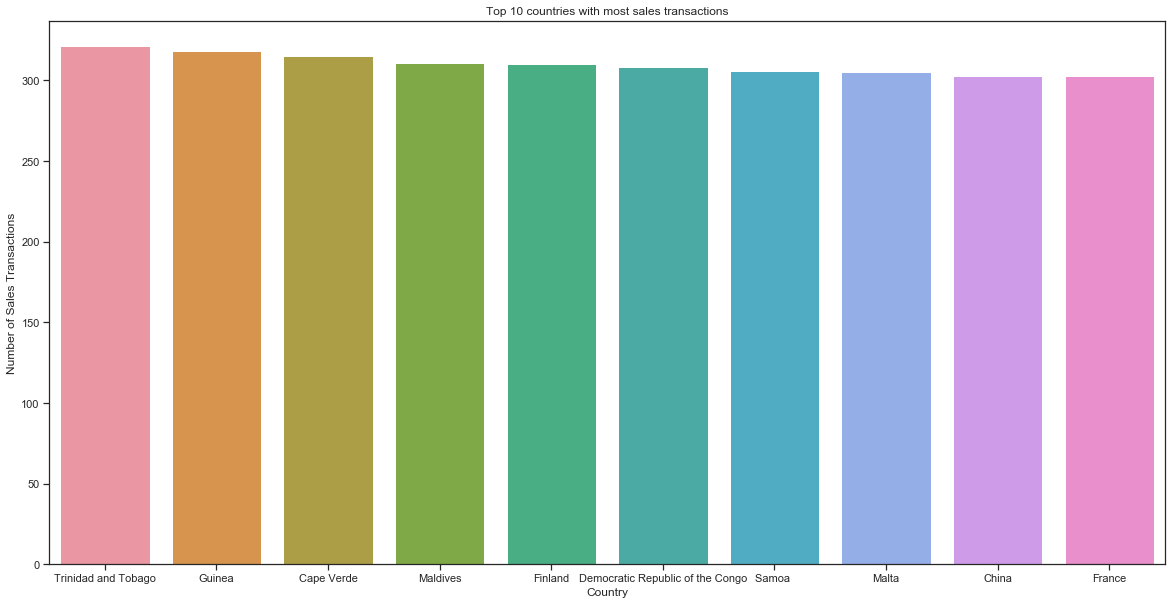

In [277]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top10.index, y=top10.values)
plt.title('Top 10 countries with most sales transactions')
plt.ylabel('Number of Sales Transactions')
plt.xlabel('Country')

### 1.2

In [336]:
# Writing the results to a text file by using with open and append, and then a for loop to iterrate though each item.
with open("DataSamples/MM_Rankings.txt", "a+", newline='') as txt_file:
    txt_file.write('\nCountries Most Sale Transactions: \n')
    for k, v in top10.iteritems():
        txt_file.write(str(k))
        txt_file.write(': ')
        txt_file.write(str(v))
        txt_file.write('\n')
    
    txt_file.write('Based on most sales and lack of shipping center we should build our new shipping center in Cape Verde because aside from the countries that we already have shipping centers in (Trinidad and Tobago, Guinea and Maledives) this country has the most sales transactions.\n')

### 2

#### 2.1

In [223]:
print(f'Returning the count of online and offline orders:')
countSC= salesClean['Sales Channel'].value_counts()
print(countSC)

Returning the count of online and offline orders:
Online     30204
Offline    19796
Name: Sales Channel, dtype: int64


#### 2.2

In [224]:
print(f'Returning the count of each order priority:')
countOP= salesClean['Order Priority'].value_counts()
print(countOP)

Returning the count of each order priority:
M    19887
H    15099
L     9986
C     5013
Name: Order Priority, dtype: int64


#### 2.3

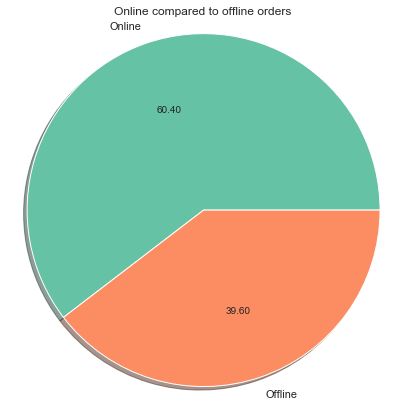

In [78]:
# Plotting a pie chart of the online and offline orders of Marvel Mart
plt.figure(figsize=(7,7))
plt.pie(countSC, labels=countSC.index, shadow=True, autopct='%.2f')
plt.axis('equal')
plt.title('Online compared to offline orders')
plt.show()

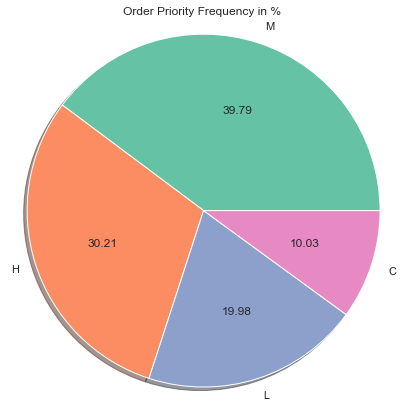

In [341]:
# Plotting a pie chart of the frequency of the different order priorities of Marvel Mart in percent 
plt.figure(figsize=(7,7))
plt.pie(countOP, labels=countOP.index, shadow=True, autopct='%.2f')
plt.axis('equal')
plt.title('Order Priority Frequency in %')
plt.show()

#### 2.4

In [337]:
# Writing the results to the text file MM_rankings.txt.
with open("DataSamples/MM_Rankings.txt", "a+", newline='') as txt_file:
    txt_file.write('\nSales Channels: \n')
    for k, v in countSC.iteritems():
        txt_file.write(str(k))
        txt_file.write(": ")
        txt_file.write(str(v))
        txt_file.write("\n")
    txt_file.write("We do more online sales.\n")

In [338]:
#Writing the results to the text file MM_rankings.txt.
with open("DataSamples/MM_Rankings.txt", "a+", newline='') as txt_file:
    txt_file.write('\nOrder Priorities: \n')
    for k, v in countSC.iteritems():
        txt_file.write(str(k))
        txt_file.write(": ")
        txt_file.write(str(v))
        txt_file.write("\n")
    txt_file.write("We do most M priorities.\n")

### 3

#### 3.1

Text(0.5, 1.0, 'Total Profit by Item Type')

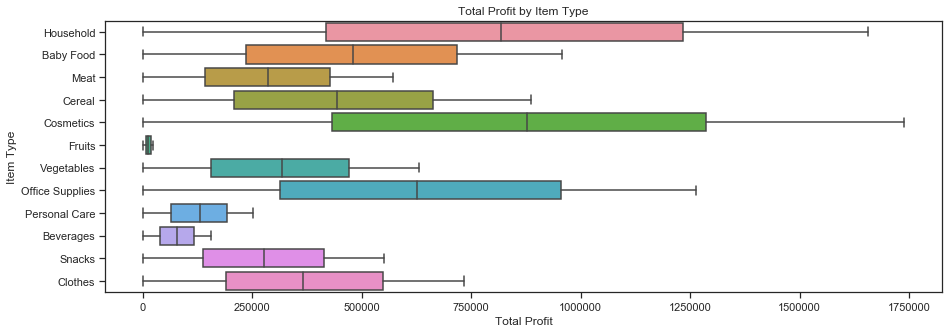

In [324]:
# Boxplot of total profit by item type.
plt.figure(figsize=(15, 5)) 
ax = sns.boxplot(salesClean['Total Profit'], salesClean['Item Type'])
plt.title('Total Profit by Item Type')

#### 3.2

In [229]:
'''Determining the sum of the total profit by grouping total profit by item type, then using the sum function to
get the total profit of each item type and finally sorting values from the top to bottom.'''

print(f'Determing the sum of the total profit by item type.')
profitDF= salesClean.groupby("Item Type")["Total Profit"].sum().sort_values(ascending = False)
print(profitDF)

Determing the sum of the total profit by item type.
Item Type
Cosmetics         3640055037.260
Household         3403301844.870
Office Supplies   2605583355.000
Baby Food         1944985596.160
Cereal            1824726412.290
Clothes           1521740766.240
Vegetables        1323261806.390
Meat              1197314404.000
Snacks            1150281274.560
Personal Care      535394370.000
Beverages          327751882.740
Fruits              51073303.220
Name: Total Profit, dtype: float64


#### 3.3

Text(0.5, 1.0, 'Sum of the Total Profit by Item Type')

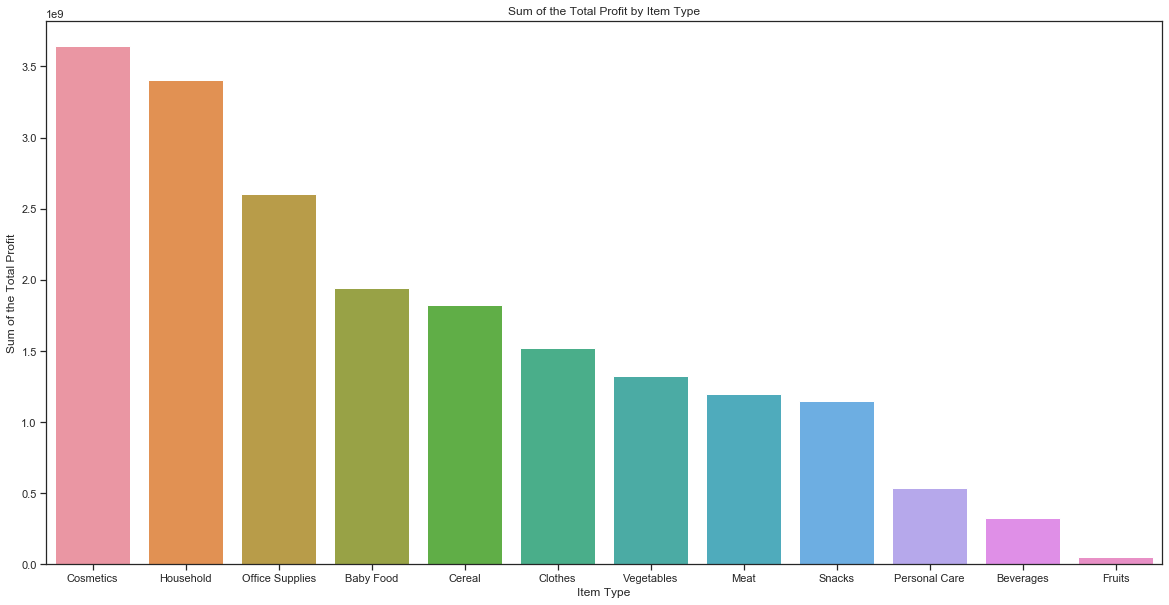

In [323]:
# Plotting a bar plot of the total profit by item type
plt.figure(figsize=(20,10))
ax = sns.barplot(x=profitDF.index, y=profitDF.values)
plt.ylabel('Sum of the Total Profit')
plt.xlabel('Item Type')
plt.title('Sum of the Total Profit by Item Type')

#### 3.4

In [226]:
# Returning the top 3 Item Types with the most sales by slicing out the first 3 
print('Returning the top 3 Item Types with the most sales.')
top3 = profitDF[:3]
print(top3)

Returning the top 3 Item Types with the most total profit.
Item Type
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Name: Total Profit, dtype: float64


#### 3.5

In [339]:
# Writing the results to the text file MM_rankings.txt.
with open("DataSamples/MM_Rankings.txt", "a+", newline='') as txt_file:
    txt_file.write('\nHighest Selling Items: \n')
    for k, v in top3.iteritems():
        txt_file.write(str(k))
        txt_file.write(": ")
        txt_file.write(str(v))
        txt_file.write("\n")
    txt_file.write("We profited from Cosmetics the most.\n")

#### 3.6 
In the boxplot of total profits by item type we can see the distribution and skewness of the data based on the minimum, maximum, first quartile, median, and third quartile. It shows us that we make the most profit with the item type cosmetics and household items respectively, while fruits and beverages are generating the least amount of profit. From a business analytics perspective, it is interesting to see that the contribution margin of the item type fruit is so low, because other, similar types of food like vegetables generate significantly higher profit. We could consider doing more quality checks and improving our marketing strategy to increase our profits for fruits. We should also review our strategy for beverages or even consider discontinuing to sell beverages. Personal care items are also generating low profits, which is why we could consider changing the placement of this item type and move it next to the cosmetics section, since these items are often bought together.  

In conclusion, we should analyze what we are doing differently for the item types that are successful and implement these strategies to the item types where we are not making high profits. We should also consider changing our marketing strategy and do a quality review for the item types that generate low profits. If this does not increase the amount of profit we make, we should discontinue those item types, and instead provide a greater variety of item types where we generate high profits, like cosmetics and household items.

### 4

#### 4.1, 4.2, 4.3

In [346]:
'''Determining the sum, average and maximum values of the columns Units Sold, Unit Cost, Total Revenue, Total Cost,
Total Profit by saving these columns into the data frame newDF and then creating new data frames for the sums, 
averages and maxes. I used the sum, mean and max function respectively to save the results into each data frame.'''

print(f'Determing the sum, average and maximum values of the columns Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profit')
newDF = salesClean[['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]

sums = newDF.sum(axis = 0)
averages = newDF.mean(axis = 0)
maxes = newDF.max(axis = 0)


print(f'Sums:\n{sums}\n')
print(f'Averages:\n{averages}\n')
print(f'Maximums:\n{maxes}\n')

Determing the sum, average and maximum values of the columns Units Sold, Unit Cost, Total Revenue, Total Cost, Total Profit
Sums:
Units Sold        249980949.000
Unit Cost           9366124.110
Total Revenue   66185806881.220
Total Cost      46657869932.970
Total Profit    19527936948.250
dtype: float64

Averages:
Units Sold         4999.619
Unit Cost           187.322
Total Revenue   1323716.138
Total Cost       933157.399
Total Profit     390558.739
dtype: float64

Maximums:
Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64



#### 4.4

Text(0.5, 0, 'Sums of Relevant Data')

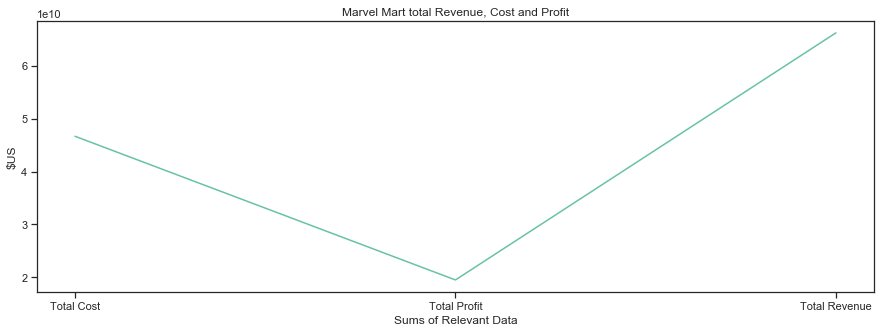

In [290]:
# Plotting a line plot displaying the sum of Total Cost, Total Profit and Total Revenue 
sums2 = sums[['Total Revenue','Total Cost', 'Total Profit']]
plt.figure(figsize=(15,5))
ax = sns.lineplot(x=sums2.index, y=sums2.values)
plt.title('Marvel Mart total Revenue, Cost and Profit')
plt.ylabel('$US')
plt.xlabel('Sums of Relevant Data')

Text(0.5, 0, 'Relevant Data')

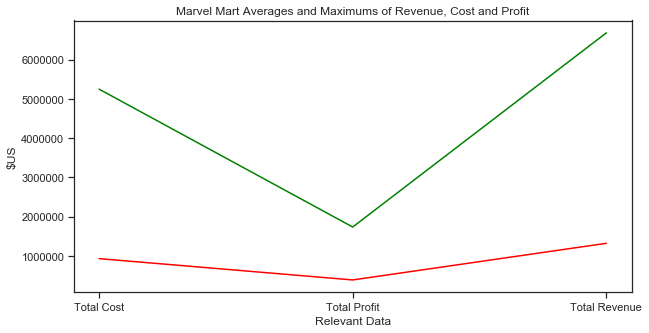

In [289]:
# Plotting line plot of the averages and maximums of Total Revenue, Total Cost and Total Profit 
averages2 = averages[['Total Revenue', 'Total Cost', 'Total Profit']]
maximums = maxes[['Total Revenue', 'Total Cost', 'Total Profit']]

plt.figure(figsize=(10,5))
sns.lineplot(averages2.index, averages2.values, color='r')
sns.lineplot(maximums.index, maximums.values, color='g')
plt.title('Marvel Mart Averages and Maximums of Revenue, Cost and Profit')
plt.ylabel('$US')
plt.xlabel('Relevant Data')

#### 4.5

In [356]:
# Writing the results of the calculations made above to the text file MM_Calc.txt.
def writeToFile(heading,newDF):
    with open("DataSamples/MM_Calc.txt", "a+") as txt_file:
        txt_file.write(heading)
        txt_file.write("\n")
        for k, v in newDF.items():
            txt_file.write(str(k))
            txt_file.write(': ')
            txt_file.write(str(v))
            txt_file.write('\n')
        txt_file.write("\n")
        
writeToFile('Sums: ', sums)
writeToFile('Averages: ', averages)
writeToFile('Maximums: ', maxes)

## Part 3: Cross-Reference Statistics

#### 1

In [350]:
'''Getting a list of the regions and the countries we sell to in that region by going trough each region to get the 
unique countries and then saving the keys and values into the data frame.'''
dataFrame = pd.read_csv('Data/MM_Sales_clean.csv')[['Region', 'Country']]

regCoun = {}
regCoun['North America'] = dataFrame[dataFrame.Region==('North America')]['Country'].unique()
regCoun['Europe'] = dataFrame[dataFrame.Region==('Europe')]['Country'].unique()
regCoun['Asia'] = dataFrame[dataFrame.Region==('Asia')]['Country'].unique()
regCoun['Australia and Oceania'] = dataFrame[dataFrame.Region==('Australia and Oceania')]['Country'].unique()
regCoun['Central America and the Caribbean'] = dataFrame[dataFrame.Region==('Central America and the Caribbean')]['Country'].unique()
regCoun['Sub-Saharan Africa'] = dataFrame[dataFrame.Region==('Sub-Saharan Africa')]['Country'].unique()
regCoun['Middle East and North Africa'] = dataFrame[dataFrame.Region==('Middle East and North Africa')]['Country'].unique()


dataFrame = [pd.DataFrame({key: regCoun[key]}) for key in regCoun.keys()]
dataFrame = pd.concat(dataframe, axis=1)


#### 2

In [326]:
# writing the above data into a csv file called Countries_By_Region.csv
dataFrame.to_csv('DataSamples/Countries_By_Regions.csv', index=False)